In [1]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation using the past 60 day stock price.

In [6]:
#pip install pandas_datareader

In [7]:
#Import the libraries
import math
from datetime import datetime
import yfinance as yf
import pandas_datareader.data as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [9]:
#Get the stock quote

stock_name = "TATASTEEL.NS"
start = datetime.strptime('2000-01-01', '%Y-%m-%d')
end = datetime.strptime('2022-08-05', '%Y-%m-%d')
yf.pdr_override()

df = pdr.get_data_yahoo(stock_name, start, end)

#Show the data 
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,8.309460,8.601414,8.202785,8.559305,2.041356,35678775
2000-01-04,8.427365,8.590185,8.031542,8.466666,2.019262,27698564
2000-01-05,8.118567,9.146021,8.118567,8.789500,2.096256,68399389
2000-01-06,8.924248,9.494120,8.924248,9.446396,2.252923,45604218
2000-01-07,9.735543,10.049955,9.336914,9.654133,2.302467,64862245
...,...,...,...,...,...,...
2022-07-29,103.000000,109.300003,102.150002,107.599998,107.599998,166959934
2022-08-01,110.500000,111.449997,106.150002,108.250000,108.250000,125365761
2022-08-02,108.000000,108.000000,105.349998,107.000000,107.000000,64935371


In [10]:
#Get the number of rows and columns in the data set
df.shape

(5648, 6)

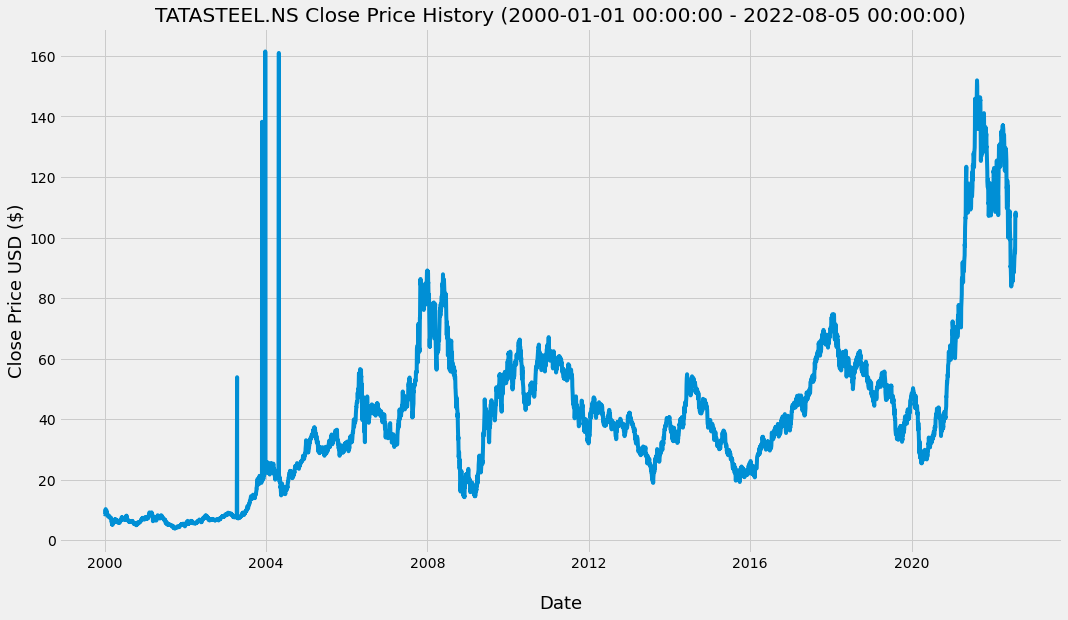

In [11]:
#Visualize the closing price history
plt.figure(figsize=(16,9))
plt.title('{} Close Price History ({} - {})'.format(stock_name, start, end))
plt.plot(df['Close'])
plt.xlabel('\nDate',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [12]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

#Converting the dataframe to a numpy array
dataset = data.values

#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.90)

training_data_len

5084

In [13]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03033118],
       [0.02974378],
       [0.03179078],
       ...,
       [0.65451602],
       [0.65483307],
       [0.6589545 ]])

In [14]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.03033118, 0.02974378, 0.03179078, 0.03595597, 0.03727317,
       0.04093996, 0.03576017, 0.03490578, 0.03273417, 0.03255617,
       0.03543977, 0.03757577, 0.03759357, 0.03412258, 0.03387337,
       0.02986838, 0.02890718, 0.02890718, 0.02885378, 0.02750098,
       0.02566758, 0.02607698, 0.02627278, 0.02589898, 0.02593458,
       0.02554298, 0.02629058, 0.02746538, 0.02655758, 0.02597018,
       0.02399438, 0.02296198, 0.02424358, 0.02442158, 0.02347818,
       0.02346038, 0.02278398, 0.02189399, 0.02194738, 0.02180498,
       0.02260598, 0.01897479, 0.01726599, 0.01710578, 0.01395519,
       0.01267359, 0.01064439, 0.0085084 , 0.01025279, 0.00877539,
       0.0082236 , 0.01080459, 0.01359919, 0.01488079, 0.01488079,
       0.01488079, 0.01468499, 0.01505879, 0.01317199, 0.01374159])]
[0.013082989027280507]

[array([0.03033118, 0.02974378, 0.03179078, 0.03595597, 0.03727317,
       0.04093996, 0.03576017, 0.03490578, 0.03273417, 0.03255617,
       0.03543977, 0.03757577, 0.0

In [15]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(5024, 60, 1)

In [17]:
from keras.backend import dropout
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [18]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
#Train the model
model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
157/157 [==============================] - 37s 140ms/step - loss: 0.0026
Epoch 2/100
157/157 [==============================] - 24s 156ms/step - loss: 0.0015
Epoch 3/100
157/157 [==============================] - 23s 149ms/step - loss: 0.0013
Epoch 4/100
157/157 [==============================] - 23s 148ms/step - loss: 0.0012
Epoch 5/100
157/157 [==============================] - 29s 185ms/step - loss: 0.0011
Epoch 6/100
157/157 [==============================] - 22s 137ms/step - loss: 0.0011
Epoch 7/100
157/157 [==============================] - 24s 151ms/step - loss: 9.9714e-04
Epoch 8/100
157/157 [==============================] - 24s 153ms/step - loss: 0.0010
Epoch 9/100
157/157 [==============================] - 24s 154ms/step - loss: 9.9035e-04
Epoch 10/100
157/157 [==============================] - 24s 156ms/step - loss: 9.1353e-04
Epoch 11/100
157/157 [==============================] - 24s 154ms/step - loss: 9.0432e-04
Epoch 12/100
157/157 [=========================

157/157 [==============================] - 24s 154ms/step - loss: 6.4383e-04
Epoch 93/100
157/157 [==============================] - 24s 154ms/step - loss: 6.4211e-04
Epoch 94/100
157/157 [==============================] - 20s 129ms/step - loss: 6.5887e-04
Epoch 95/100
157/157 [==============================] - 223s 1s/step - loss: 6.8023e-04
Epoch 96/100
157/157 [==============================] - 24s 150ms/step - loss: 6.6468e-04
Epoch 97/100
157/157 [==============================] - 18s 113ms/step - loss: 6.3914e-04
Epoch 98/100
157/157 [==============================] - 14s 86ms/step - loss: 6.5238e-04
Epoch 99/100
157/157 [==============================] - 13s 85ms/step - loss: 6.4755e-04
Epoch 100/100
157/157 [==============================] - 16s 100ms/step - loss: 6.4266e-04


In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] 
#Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Stock Price Prediction Model for {}'.format(stock_name))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

In [ ]:
Test_stock_name = "TATASTEEL.NS"
Test_start = datetime.strptime('2000-01-01', '%Y-%m-%d')
Test_end = datetime.strptime('2022-07-16', '%Y-%m-%d')
yf.pdr_override()

#Get the quote
quote = pdr.get_data_yahoo(Test_stock_name, Test_start, Test_end)

#Create a new dataframe
new_df = quote.filter(['Close'])

#Get the last 60 day closing price 
last_60_days = new_df[-60:].values

#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test = []

#Append teh past 60 days
X_test.append(last_60_days_scaled)

#Convert the X_test data set to a numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled price
pred_price = model.predict(X_test)

#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print("Tomorrow's Closing Price will be " , pred_price)